In [60]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import shap 


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [61]:
df = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned.csv")

In [62]:
#check if there are any weight class features
df['weight_class_Middleweight'].value_counts()

weight_class_Middleweight
False    6369
True      984
Name: count, dtype: int64

In [63]:
#class imbalance, oversampling minority class
X = df.drop(columns=['Winner'])
y= df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#checking number of features
print(X_train.shape)

(4411, 159)


In [13]:
#neural network

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


    

In [14]:
class Net1(nn.Module):
    def __init__(self, input_size):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [18]:
input_size = 159  # Number of features in your dataset
model1 = Net1(input_size)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model1.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 50  # Adjust the number of epochs as needed
model1.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = model1(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Evaluating the model on the test set
model1.eval()
with torch.no_grad():
    outputs1 = model1(X_test)
    predictions1 = (outputs1.numpy() > 0.5).astype(int)

Epoch 1/50, Loss: 0.6420
Epoch 2/50, Loss: 0.6022
Epoch 3/50, Loss: 0.5819
Epoch 4/50, Loss: 0.5643
Epoch 5/50, Loss: 0.5493
Epoch 6/50, Loss: 0.5342
Epoch 7/50, Loss: 0.5154
Epoch 8/50, Loss: 0.4923
Epoch 9/50, Loss: 0.4697
Epoch 10/50, Loss: 0.4548
Epoch 11/50, Loss: 0.4219
Epoch 12/50, Loss: 0.3964
Epoch 13/50, Loss: 0.3718
Epoch 14/50, Loss: 0.3438
Epoch 15/50, Loss: 0.3313
Epoch 16/50, Loss: 0.2971
Epoch 17/50, Loss: 0.2798
Epoch 18/50, Loss: 0.2651
Epoch 19/50, Loss: 0.2375
Epoch 20/50, Loss: 0.2188
Epoch 21/50, Loss: 0.1990
Epoch 22/50, Loss: 0.1785
Epoch 23/50, Loss: 0.1689
Epoch 24/50, Loss: 0.1534
Epoch 25/50, Loss: 0.1451
Epoch 26/50, Loss: 0.1327
Epoch 27/50, Loss: 0.1166
Epoch 28/50, Loss: 0.1079
Epoch 29/50, Loss: 0.1043
Epoch 30/50, Loss: 0.0884
Epoch 31/50, Loss: 0.0833
Epoch 32/50, Loss: 0.0737
Epoch 33/50, Loss: 0.0722
Epoch 34/50, Loss: 0.0772
Epoch 35/50, Loss: 0.0546
Epoch 36/50, Loss: 0.0501
Epoch 37/50, Loss: 0.0540
Epoch 38/50, Loss: 0.0532
Epoch 39/50, Loss: 0.

In [19]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, predictions1))
print('Precision:', precision_score(y_test, predictions1))
print('Recall:', recall_score(y_test, predictions1))
print('F1 Score:', f1_score(y_test, predictions1))
print('ROC AUC Score:', roc_auc_score(y_test, predictions1))

Accuracy: 0.6155676410605031
Precision: 0.4636542239685658
Recall: 0.44654683065279094
F1 Score: 0.4549397590361446
ROC AUC Score: 0.5784458291194989


In [20]:
#oversampling minority class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [22]:

class Net2(nn.Module):
    def __init__(self, input_size):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x
    
input_size = 159  # Number of features in your dataset
model2 = Net2(input_size)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model2.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 1000  # Adjust the number of epochs as needed
model2.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = model2(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Evaluating the model on the test set
model2.eval()
with torch.no_grad():
    outputs2 = model2(X_test)
    predictions2 = (outputs2.numpy() > 0.5).astype(int)

Epoch 1/1000, Loss: 0.6445
Epoch 2/1000, Loss: 0.5410
Epoch 3/1000, Loss: 0.4833
Epoch 4/1000, Loss: 0.4525
Epoch 5/1000, Loss: 0.4228
Epoch 6/1000, Loss: 0.4001
Epoch 7/1000, Loss: 0.3747
Epoch 8/1000, Loss: 0.3602
Epoch 9/1000, Loss: 0.3382
Epoch 10/1000, Loss: 0.3128
Epoch 11/1000, Loss: 0.3031
Epoch 12/1000, Loss: 0.2756
Epoch 13/1000, Loss: 0.2668
Epoch 14/1000, Loss: 0.2474
Epoch 15/1000, Loss: 0.2313
Epoch 16/1000, Loss: 0.2122
Epoch 17/1000, Loss: 0.1933
Epoch 18/1000, Loss: 0.1854
Epoch 19/1000, Loss: 0.1726
Epoch 20/1000, Loss: 0.1451
Epoch 21/1000, Loss: 0.1340
Epoch 22/1000, Loss: 0.1267
Epoch 23/1000, Loss: 0.1193
Epoch 24/1000, Loss: 0.1103
Epoch 25/1000, Loss: 0.1075
Epoch 26/1000, Loss: 0.0890
Epoch 27/1000, Loss: 0.0789
Epoch 28/1000, Loss: 0.0795
Epoch 29/1000, Loss: 0.0905
Epoch 30/1000, Loss: 0.0745
Epoch 31/1000, Loss: 0.0782
Epoch 32/1000, Loss: 0.0639
Epoch 33/1000, Loss: 0.0596
Epoch 34/1000, Loss: 0.0519
Epoch 35/1000, Loss: 0.0509
Epoch 36/1000, Loss: 0.0399
E

In [23]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, predictions2))
print('Precision:', precision_score(y_test, predictions2))
print('Recall:', recall_score(y_test, predictions2))
print('F1 Score:', f1_score(y_test, predictions2))
print('ROC AUC Score:', roc_auc_score(y_test, predictions2))

Accuracy: 0.6041100030220611
Precision: 0.448068669527897
Recall: 0.43902439024390244
F1 Score: 0.443500424808836
ROC AUC Score: 0.5678612517257249


In [41]:
train_features = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Correct placement of unsqueeze
test_features = torch.tensor(X_test, dtype=torch.float32)

# Prepare the dataset and dataloader with unique names
train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

C:\Users\kisha\AppData\Local\Temp\ipykernel_13664\1189486903.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_features = torch.tensor(X_train, dtype=torch.float32)
C:\Users\kisha\AppData\Local\Temp\ipykernel_13664\1189486903.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Correct placement of unsqueeze
C:\Users\kisha\AppData\Local\Temp\ipykernel_13664\1189486903.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_features = torch.tensor(X_test, dty

In [48]:
class DeepNet1(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 159
deep_model1 = DeepNet1(input_dim)

loss_function1 = nn.BCELoss()
optimizer1 = optim.Adam(deep_model1.parameters(), lr=0.001)

total_epochs = 50
deep_model1.train()
for epoch_num in range(total_epochs):
    accumulated_loss1 = 0.0
    for batch_features, batch_labels in train_loader_unique:
        batch_labels = batch_labels.view(-1,1)  # Remove extra dimensions if any
        optimizer1.zero_grad()
        batch_outputs = deep_model1(batch_features)
        batch_loss = loss_function1(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer1.step()

        accumulated_loss1 += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss1 = accumulated_loss1 / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss1:.4f}')

deep_model1.eval()
with torch.no_grad():
    test_outputs1 = deep_model1(test_features)
    test_predictions1 = (test_outputs1.numpy() > 0.5).astype(int)



Epoch 1/50, Loss: 0.6545
Epoch 2/50, Loss: 0.5298
Epoch 3/50, Loss: 0.4622
Epoch 4/50, Loss: 0.4243
Epoch 5/50, Loss: 0.3948
Epoch 6/50, Loss: 0.3722
Epoch 7/50, Loss: 0.3325
Epoch 8/50, Loss: 0.3074
Epoch 9/50, Loss: 0.2814
Epoch 10/50, Loss: 0.2536
Epoch 11/50, Loss: 0.2294
Epoch 12/50, Loss: 0.2055
Epoch 13/50, Loss: 0.1828
Epoch 14/50, Loss: 0.1748
Epoch 15/50, Loss: 0.1395
Epoch 16/50, Loss: 0.1336
Epoch 17/50, Loss: 0.0940
Epoch 18/50, Loss: 0.1166
Epoch 19/50, Loss: 0.0836
Epoch 20/50, Loss: 0.0991
Epoch 21/50, Loss: 0.0707
Epoch 22/50, Loss: 0.1016
Epoch 23/50, Loss: 0.0635
Epoch 24/50, Loss: 0.0516
Epoch 25/50, Loss: 0.0625
Epoch 26/50, Loss: 0.0749
Epoch 27/50, Loss: 0.0416
Epoch 28/50, Loss: 0.0575
Epoch 29/50, Loss: 0.0473
Epoch 30/50, Loss: 0.0427
Epoch 31/50, Loss: 0.0296
Epoch 32/50, Loss: 0.0258
Epoch 33/50, Loss: 0.0739
Epoch 34/50, Loss: 0.0375
Epoch 35/50, Loss: 0.0407
Epoch 36/50, Loss: 0.0324
Epoch 37/50, Loss: 0.0516
Epoch 38/50, Loss: 0.0468
Epoch 39/50, Loss: 0.

In [49]:
print('Accuracy:', accuracy_score(y_test, test_predictions1))
print('Precision:', precision_score(y_test, test_predictions1))
print('Recall:', recall_score(y_test, test_predictions1))
print('F1 Score:', f1_score(y_test, test_predictions1))
print('ROC AUC Score:', roc_auc_score(y_test, test_predictions1))


Accuracy: 0.6174070716228468
Precision: 0.46655082536924414
Recall: 0.45164003364171573
F1 Score: 0.45897435897435895
ROC AUC Score: 0.5810086960661409


In [51]:
train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

class DeepNet2(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 159
deep_model2 = DeepNet2(input_dim)

loss_function2 = nn.BCELoss()
optimizer2 = optim.Adam(deep_model2.parameters(), lr=0.001)

total_epochs = 50
deep_model2.train()
for epoch_num in range(total_epochs):
    accumulated_loss2 = 0.0
    for batch_features, batch_labels in train_loader_unique:
        batch_labels = batch_labels.view(-1,1)  # Remove extra dimensions if any
        optimizer2.zero_grad()
        batch_outputs = deep_model2(batch_features)
        batch_loss = loss_function2(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer2.step()

        accumulated_loss2 += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss2 = accumulated_loss2 / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss2:.4f}')

deep_model2.eval()
with torch.no_grad():
    test_outputs2 = deep_model2(test_features)
    test_predictions2 = (test_outputs2.numpy() > 0.5).astype(int)



Epoch 1/50, Loss: 0.6456
Epoch 2/50, Loss: 0.5165
Epoch 3/50, Loss: 0.4523
Epoch 4/50, Loss: 0.4126
Epoch 5/50, Loss: 0.3899
Epoch 6/50, Loss: 0.3525
Epoch 7/50, Loss: 0.3280
Epoch 8/50, Loss: 0.3019
Epoch 9/50, Loss: 0.2759
Epoch 10/50, Loss: 0.2499
Epoch 11/50, Loss: 0.2421
Epoch 12/50, Loss: 0.2044
Epoch 13/50, Loss: 0.1981
Epoch 14/50, Loss: 0.1681
Epoch 15/50, Loss: 0.1620
Epoch 16/50, Loss: 0.1226
Epoch 17/50, Loss: 0.1274
Epoch 18/50, Loss: 0.1034
Epoch 19/50, Loss: 0.1116
Epoch 20/50, Loss: 0.0992
Epoch 21/50, Loss: 0.0829
Epoch 22/50, Loss: 0.0822
Epoch 23/50, Loss: 0.0572
Epoch 24/50, Loss: 0.0719
Epoch 25/50, Loss: 0.0838
Epoch 26/50, Loss: 0.0618
Epoch 27/50, Loss: 0.0655
Epoch 28/50, Loss: 0.0338
Epoch 29/50, Loss: 0.0330
Epoch 30/50, Loss: 0.0393
Epoch 31/50, Loss: 0.1119
Epoch 32/50, Loss: 0.1253
Epoch 33/50, Loss: 0.0932
Epoch 34/50, Loss: 0.0892
Epoch 35/50, Loss: 0.0881
Epoch 36/50, Loss: 0.0903
Epoch 37/50, Loss: 0.0924
Epoch 38/50, Loss: 0.1543
Epoch 39/50, Loss: 0.

In [52]:
print('Accuracy:', accuracy_score(y_test, test_predictions2))
print('Precision:', precision_score(y_test, test_predictions2))
print('Recall:', recall_score(y_test, test_predictions2))
print('F1 Score:', f1_score(y_test, test_predictions2))
print('ROC AUC Score:', roc_auc_score(y_test, test_predictions2))
print('Confusion Matrix:', confusion_matrix(y_test, test_predictions2))
print('Classification Report:', classification_report(y_test, test_predictions2))


Accuracy: 0.6177092777274101
Precision: 0.46631205673758863
Recall: 0.44238856181665265
F1 Score: 0.45403539059128184
ROC AUC Score: 0.5792131488328546
Confusion Matrix: [[1518  602]
 [ 663  526]]
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.72      0.71      2120
           1       0.47      0.44      0.45      1189

    accuracy                           0.62      3309
   macro avg       0.58      0.58      0.58      3309
weighted avg       0.61      0.62      0.62      3309



In [54]:
train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

class DeepNet3(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet3, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.layer4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.layer5 = nn.Linear(32, 16)
        self.bn5 = nn.BatchNorm1d(16)
        self.output_layer = nn.Linear(16, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.dropout(self.activation(self.bn1(self.layer1(x))))
        x = self.dropout(self.activation(self.bn2(self.layer2(x))))
        x = self.dropout(self.activation(self.bn3(self.layer3(x))))
        x = self.dropout(self.activation(self.bn4(self.layer4(x))))
        x = self.dropout(self.activation(self.bn5(self.layer5(x))))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 159
deep_model3 = DeepNet3(input_dim)

loss_function3 = nn.BCELoss()
optimizer3 = optim.Adam(deep_model3.parameters(), lr=0.001)

total_epochs = 50
deep_model3.train()
for epoch_num in range(total_epochs):
    accumulated_loss3 = 0.0
    for batch_features, batch_labels in train_loader_unique:
        batch_labels = batch_labels.view(-1,1)  # Remove extra dimensions if any
        optimizer3.zero_grad()
        batch_outputs = deep_model3(batch_features)
        batch_loss = loss_function3(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer3.step()

        accumulated_loss3 += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss3 = accumulated_loss3 / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss3:.4f}')

deep_model3.eval()
with torch.no_grad():
    test_outputs3 = deep_model3(test_features)
    test_predictions3 = (test_outputs3.numpy() > 0.5).astype(int)



Epoch 1/50, Loss: 0.7068
Epoch 2/50, Loss: 0.6826
Epoch 3/50, Loss: 0.6649
Epoch 4/50, Loss: 0.6520
Epoch 5/50, Loss: 0.6379
Epoch 6/50, Loss: 0.6261
Epoch 7/50, Loss: 0.6085
Epoch 8/50, Loss: 0.5969
Epoch 9/50, Loss: 0.5818
Epoch 10/50, Loss: 0.5712
Epoch 11/50, Loss: 0.5595
Epoch 12/50, Loss: 0.5467
Epoch 13/50, Loss: 0.5311
Epoch 14/50, Loss: 0.5210
Epoch 15/50, Loss: 0.5148
Epoch 16/50, Loss: 0.5138
Epoch 17/50, Loss: 0.5009
Epoch 18/50, Loss: 0.4961
Epoch 19/50, Loss: 0.4901
Epoch 20/50, Loss: 0.4930
Epoch 21/50, Loss: 0.4864
Epoch 22/50, Loss: 0.4710
Epoch 23/50, Loss: 0.4690
Epoch 24/50, Loss: 0.4649
Epoch 25/50, Loss: 0.4687
Epoch 26/50, Loss: 0.4606
Epoch 27/50, Loss: 0.4601
Epoch 28/50, Loss: 0.4514
Epoch 29/50, Loss: 0.4526
Epoch 30/50, Loss: 0.4504
Epoch 31/50, Loss: 0.4498
Epoch 32/50, Loss: 0.4367
Epoch 33/50, Loss: 0.4360
Epoch 34/50, Loss: 0.4429
Epoch 35/50, Loss: 0.4336
Epoch 36/50, Loss: 0.4242
Epoch 37/50, Loss: 0.4215
Epoch 38/50, Loss: 0.4228
Epoch 39/50, Loss: 0.

Accuracy: 0.6325173768510124
Precision: 0.489191353082466
Recall: 0.5138772077375946
F1 Score: 0.5012305168170632
ROC AUC Score: 0.6064669057555897
Confusion Matrix: [[1482  638]
 [ 578  611]]
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.70      0.71      2120
           1       0.49      0.51      0.50      1189

    accuracy                           0.63      3309
   macro avg       0.60      0.61      0.61      3309
weighted avg       0.64      0.63      0.63      3309



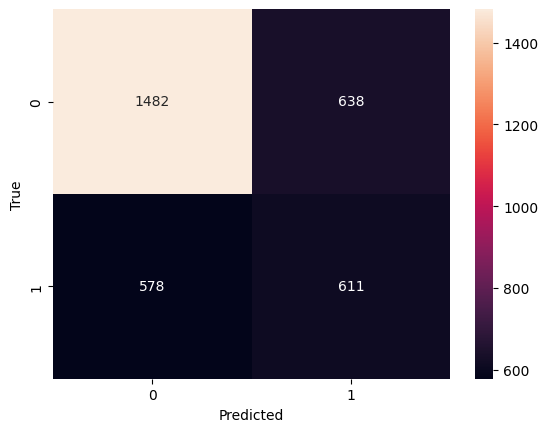

In [55]:
print('Accuracy:', accuracy_score(y_test, test_predictions3))
print('Precision:', precision_score(y_test, test_predictions3))
print('Recall:', recall_score(y_test, test_predictions3))
print('F1 Score:', f1_score(y_test, test_predictions3))
print('ROC AUC Score:', roc_auc_score(y_test, test_predictions3))
print('Confusion Matrix:', confusion_matrix(y_test, test_predictions3))
print('Classification Report:', classification_report(y_test, test_predictions3))

#confusion matrix
cm2 = confusion_matrix(y_test, test_predictions3)
sns.heatmap(cm2, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [56]:
#saving the model
torch.save(deep_model3.state_dict(), 'C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/DS-UoN-Sports-ML-bhamidipati/savedModels/deep_model.pth')

In [22]:
train_features = torch.tensor(X_train, dtype=torch.float32)
train_labels = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
test_features = torch.tensor(X_test, dtype=torch.float32)

train_dataset_unique = TensorDataset(train_features, train_labels)
train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

class DeepNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.layer6 = nn.Linear(32, 16)
        self.layer7 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.activation(self.layer6(x))
        x = self.activation(self.layer7(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 159
deep_model = DeepNet(input_dim)

loss_function = nn.BCELoss()
optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)

total_epochs = 50
deep_model.train()
for epoch_num in range(total_epochs):
    accumulated_loss = 0.0
    for batch_features, batch_labels in train_loader_unique:
        optimizer_unique.zero_grad()
        batch_outputs = deep_model(batch_features)
        batch_loss = loss_function(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer_unique.step()

        accumulated_loss += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

deep_model.eval()
with torch.no_grad():
    test_outputs = deep_model(test_features)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)

Epoch 1/50, Loss: 0.6487
Epoch 2/50, Loss: 0.5278
Epoch 3/50, Loss: 0.4647
Epoch 4/50, Loss: 0.4319
Epoch 5/50, Loss: 0.3977
Epoch 6/50, Loss: 0.3692
Epoch 7/50, Loss: 0.3567
Epoch 8/50, Loss: 0.3203
Epoch 9/50, Loss: 0.2997
Epoch 10/50, Loss: 0.2628
Epoch 11/50, Loss: 0.2493
Epoch 12/50, Loss: 0.2119
Epoch 13/50, Loss: 0.1996
Epoch 14/50, Loss: 0.1784
Epoch 15/50, Loss: 0.1632
Epoch 16/50, Loss: 0.1562
Epoch 17/50, Loss: 0.1303
Epoch 18/50, Loss: 0.1335
Epoch 19/50, Loss: 0.1142
Epoch 20/50, Loss: 0.0980
Epoch 21/50, Loss: 0.0914
Epoch 22/50, Loss: 0.0822
Epoch 23/50, Loss: 0.0618
Epoch 24/50, Loss: 0.0629
Epoch 25/50, Loss: 0.0676
Epoch 26/50, Loss: 0.0792
Epoch 27/50, Loss: 0.0613
Epoch 28/50, Loss: 0.0574
Epoch 29/50, Loss: 0.0530
Epoch 30/50, Loss: 0.0490
Epoch 31/50, Loss: 0.0443
Epoch 32/50, Loss: 0.0351
Epoch 33/50, Loss: 0.0367
Epoch 34/50, Loss: 0.0328
Epoch 35/50, Loss: 0.0381
Epoch 36/50, Loss: 0.0488
Epoch 37/50, Loss: 0.0213
Epoch 38/50, Loss: 0.0282
Epoch 39/50, Loss: 0.

In [23]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, test_predictions))
print('Precision:', precision_score(y_test, test_predictions))
print('Recall:', recall_score(y_test, test_predictions))
print('F1 Score:', f1_score(y_test, test_predictions))


Accuracy: 0.6077364762768208
Precision: 0.4568487727632621
Recall: 0.4852817493692178
F1 Score: 0.4706362153344209


In [24]:

class DeepNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 2048)
        self.layer2 = nn.Linear(2048, 1024)
        self.layer3 = nn.Linear(1024, 512)
        self.layer4 = nn.Linear(512, 256)
        self.layer5 = nn.Linear(256, 128)
        self.layer6 = nn.Linear(128, 64)
        self.layer7 = nn.Linear(64, 32)
        self.layer8 = nn.Linear(32, 16)
        self.layer9 = nn.Linear(16, 8)
        self.layer10 = nn.Linear(8, 4)
        self.layer11 = nn.Linear(4, 2)
        self.output_layer = nn.Linear(2, 1)
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.activation(self.layer6(x))
        x = self.activation(self.layer7(x))
        x = self.activation(self.layer8(x))
        x = self.activation(self.layer9(x))
        x = self.activation(self.layer10(x))
        x = self.activation(self.layer11(x))
        x = self.output_activation(self.output_layer(x))
        return x

input_dim = 159
deep_model = DeepNet(input_dim)

loss_function = nn.BCELoss()
optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)

total_epochs = 100
deep_model.train()
for epoch_num in range(total_epochs):
    accumulated_loss = 0.0
    for batch_features, batch_labels in train_loader_unique:
        optimizer_unique.zero_grad()
        batch_outputs = deep_model(batch_features)
        batch_loss = loss_function(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer_unique.step()

        accumulated_loss += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

deep_model.eval()
with torch.no_grad():
    test_outputs = deep_model(test_features)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)

Epoch 1/100, Loss: 0.6874
Epoch 2/100, Loss: 0.5571
Epoch 3/100, Loss: 0.4807
Epoch 4/100, Loss: 0.4514
Epoch 5/100, Loss: 0.4253
Epoch 6/100, Loss: 0.4046
Epoch 7/100, Loss: 0.3792
Epoch 8/100, Loss: 0.3471
Epoch 9/100, Loss: 0.3443
Epoch 10/100, Loss: 0.3119
Epoch 11/100, Loss: 0.2903
Epoch 12/100, Loss: 0.2693
Epoch 13/100, Loss: 0.2554
Epoch 14/100, Loss: 0.2273
Epoch 15/100, Loss: 0.2530
Epoch 16/100, Loss: 0.2323
Epoch 17/100, Loss: 0.2079
Epoch 18/100, Loss: 0.2006
Epoch 19/100, Loss: 0.1702
Epoch 20/100, Loss: 0.1552
Epoch 21/100, Loss: 0.1334
Epoch 22/100, Loss: 0.0999
Epoch 23/100, Loss: 0.1858
Epoch 24/100, Loss: 0.1209
Epoch 25/100, Loss: 0.0780
Epoch 26/100, Loss: 0.0876
Epoch 27/100, Loss: 0.0778
Epoch 28/100, Loss: 0.0739
Epoch 29/100, Loss: 0.0694
Epoch 30/100, Loss: 0.0969
Epoch 31/100, Loss: 0.0613
Epoch 32/100, Loss: 0.0624
Epoch 33/100, Loss: 0.0313
Epoch 34/100, Loss: 0.0467
Epoch 35/100, Loss: 0.0530
Epoch 36/100, Loss: 0.0438
Epoch 37/100, Loss: 0.1425
Epoch 38/1

In [25]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, test_predictions))
print('Precision:', precision_score(y_test, test_predictions))
print('Recall:', recall_score(y_test, test_predictions))
print('F1 Score:', f1_score(y_test, test_predictions))


Accuracy: 0.6065276518585675
Precision: 0.4570342205323194
Recall: 0.5054667788057191
F1 Score: 0.48003194888178913


In [20]:
class DeepNet(nn.Module):
    def __init__(self, input_dim):
        super(DeepNet, self).__init__()
        self.layer1 = nn.Linear(input_dim, 4096)
        self.layer2 = nn.Linear(4096, 2048)
        self.layer3 = nn.Linear(2048, 1024)
        self.layer4 = nn.Linear(1024, 512)
        self.layer5 = nn.Linear(512, 256)
        self.layer6 = nn.Linear(256, 128)
        self.layer7 = nn.Linear(128, 64)
        self.layer8 = nn.Linear(64, 32)
        self.layer9 = nn.Linear(32, 16)
        self.layer10 = nn.Linear(16, 8)
        self.layer11 = nn.Linear(8, 4)
        self.layer12 = nn.Linear(4, 1)  # Adjusted to match the expected output size
        self.activation = nn.ReLU()
        self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.activation(self.layer6(x))
        x = self.activation(self.layer7(x))
        x = self.activation(self.layer8(x))
        x = self.activation(self.layer9(x))
        x = self.activation(self.layer10(x))
        x = self.activation(self.layer11(x))
        x = self.output_activation(self.layer12(x))
        return x

input_dim = 159
deep_model = DeepNet(input_dim)

loss_function = nn.BCELoss()
optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)

total_epochs = 1000
deep_model.train()
for epoch_num in range(total_epochs):
    accumulated_loss = 0.0
    for batch_features, batch_labels in train_loader_unique:
        optimizer_unique.zero_grad()
        batch_outputs = deep_model(batch_features)
        batch_loss = loss_function(batch_outputs, batch_labels)
        batch_loss.backward()
        optimizer_unique.step()

        accumulated_loss += batch_loss.item() * batch_features.size(0)

    avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
    print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

deep_model.eval()
with torch.no_grad():
    test_outputs = deep_model(test_features)
    test_predictions = (test_outputs.numpy() > 0.5).astype(int)

Epoch 1/1000, Loss: 0.7070
Epoch 2/1000, Loss: 0.6731
Epoch 3/1000, Loss: 0.6102
Epoch 4/1000, Loss: 0.5779
Epoch 5/1000, Loss: 0.5501
Epoch 6/1000, Loss: 0.5372
Epoch 7/1000, Loss: 0.5305
Epoch 8/1000, Loss: 0.5167
Epoch 9/1000, Loss: 0.5052
Epoch 10/1000, Loss: 0.4778
Epoch 11/1000, Loss: 0.4721
Epoch 12/1000, Loss: 0.4777
Epoch 13/1000, Loss: 0.4850
Epoch 14/1000, Loss: 0.4557
Epoch 15/1000, Loss: 0.4507
Epoch 16/1000, Loss: 0.4383
Epoch 17/1000, Loss: 0.4363
Epoch 18/1000, Loss: 0.5031
Epoch 19/1000, Loss: 0.4266
Epoch 20/1000, Loss: 0.4059
Epoch 21/1000, Loss: 0.4407
Epoch 22/1000, Loss: 0.4117
Epoch 23/1000, Loss: 0.3927
Epoch 24/1000, Loss: 0.4795
Epoch 25/1000, Loss: 0.4407
Epoch 26/1000, Loss: 0.4829
Epoch 27/1000, Loss: 0.4040
Epoch 28/1000, Loss: 0.3757
Epoch 29/1000, Loss: 0.3816
Epoch 30/1000, Loss: 0.3670
Epoch 31/1000, Loss: 0.3546
Epoch 32/1000, Loss: 0.3556
Epoch 33/1000, Loss: 0.3416
Epoch 34/1000, Loss: 0.3473
Epoch 35/1000, Loss: 0.3250
Epoch 36/1000, Loss: 0.3318
E

In [21]:
#evaluating the model
print('Accuracy:', accuracy_score(y_test, test_predictions))
print('Precision:', precision_score(y_test, test_predictions))
print('Recall:', recall_score(y_test, test_predictions))
print('F1 Score:', f1_score(y_test, test_predictions))

Accuracy: 0.6128739800543971
Precision: 0.4575645756457565
Recall: 0.41715727502102606
F1 Score: 0.43642762868455787


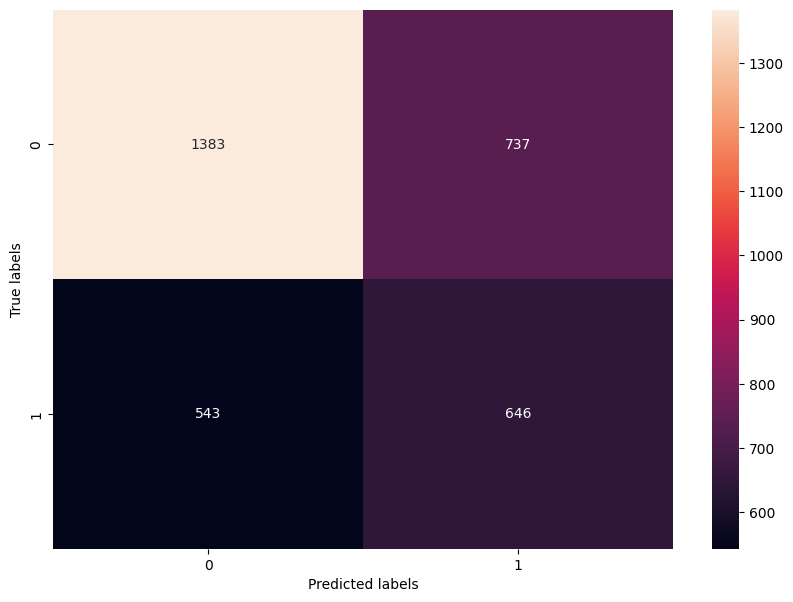

In [30]:
#confusion matrix plot

cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()



PermutationExplainer explainer: 5205it [5:27:13,  3.77s/it]                            


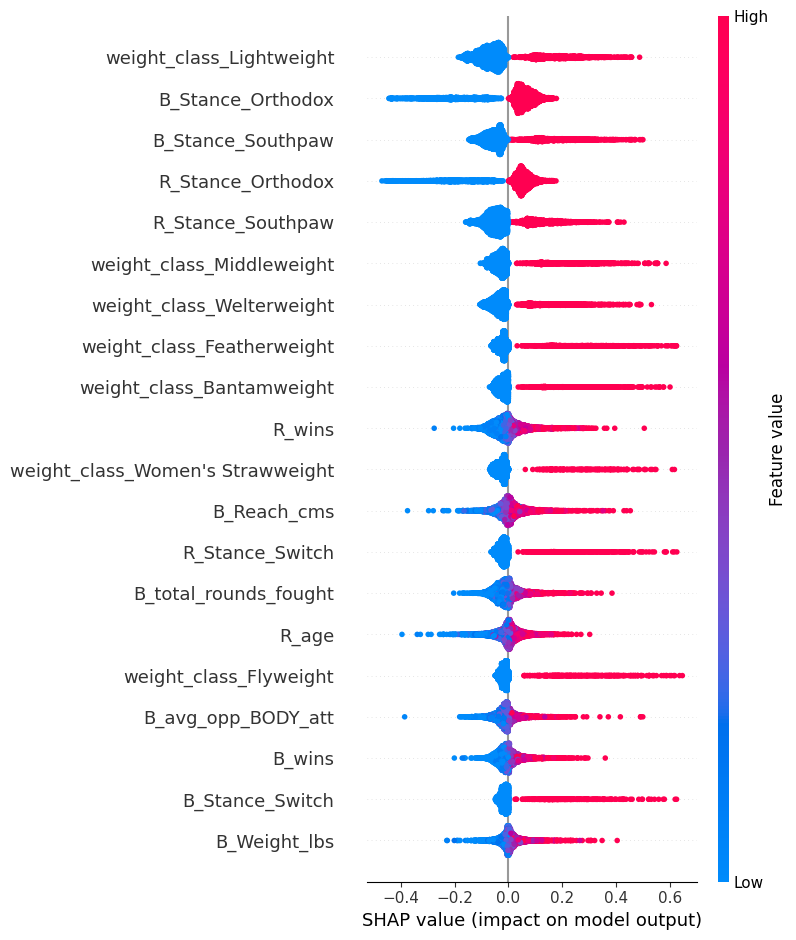

In [32]:
def model_predict(input_data):
    input_tensor = torch.tensor(input_data, dtype=torch.float32)
    deep_model.eval()
    with torch.no_grad():
        predictions = deep_model(input_tensor).numpy()
    return predictions

# Convert the train features to a numpy array (if not already done)
train_features_np = train_features.numpy()

# Initialize the SHAP explainer
explainer = shap.Explainer(model_predict, train_features_np)

# Calculate SHAP values
shap_values = explainer(train_features_np)

# Plot the SHAP values
shap.summary_plot(shap_values, train_features_np, feature_names=X.columns)